(d_crs_what_is_it)=

----------------

```{admonition} Learning Objectives
* Learn what a Coordinate Reference System (CRS) is
* Learn about the properties of a CRS
* Differentiate projected and geographic CRSs
* Understand CRS impact on shape, area and distance
```
```{admonition} Review
* [Affine Transforms](d_affine.md)
```
----------------



# What is a CRS?
 
Implicit with any GIS data is a spatial reference system. It can consist of a simple arbitrary reference system such as a 10 m x 10 m sampling grid in a wood lot or, the boundaries of a soccer field or, it can consist of a geographic reference system, i.e. one where the spatial features are mapped to an earth based reference system. The focus of this topic is on earth reference systems which can be based on a Geographic Coordinate System (GCS) or a Project Coordinate System (PCS). 

## Geographic Coordinate Systems

A geographic coordinate system is a reference system for identifying locations on the curved surface of the earth. Locations on the earth's surface are measured in angular units from the center of the earth relative to two planes: the plane defined by the equator and the plane defined by the prime meridian (which crosses Greenwich England). A location is therefore defined by two values: a latitudinal value and a longitudinal value.

```{figure} ../_static/img/lat_vs_lon.png
:name: lat lon
Examples of latitudinal lines are shown on the left and examples of longitudinal lines are shown on the right. The 0&deg; degree reference lines for each are shown in red (equator for latitudinal measurements and prime meridian for longitudinal measurements).
```

A latitude measures the angle from the equatorial plane to the location on the earth's surface. A longitude measures the angle between the prime meridian plane and the north-south plane that intersects the location of interest. For example The George Washington University is located at around 38.89&deg; North and -77.04&deg; West. In a GIS system, the North-South and East-West directions are encoded as signs. North and East are assigned a positive (`+`) sign and South and West are assigned a negative (`-`) sign. The university location is therefore encoded as +38.89&deg; and -77.04&deg;.

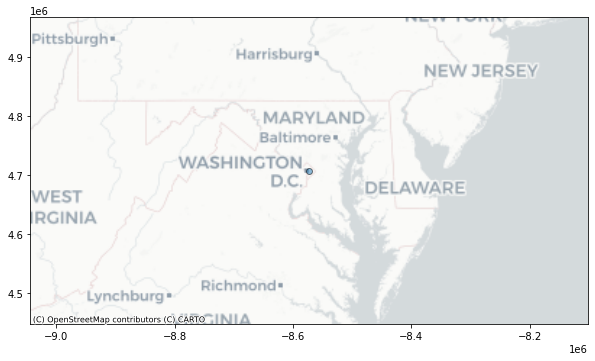

In [1]:
import geopandas
import contextily as ctx
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities = cities[cities.name == 'Washington, D.C.']
cities = cities.to_crs(epsg=3857) # project to webmercator

ax = cities.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron,zoom = 6, reset_extent = True)

A GCS is defined by an **ellipsoid**, **geoid** and **datum**. These elements are presented next.

### Sphere and Ellipsoid

Assuming that the earth is a perfect sphere greatly simplifies mathematical calculations and works well for small-scale maps (maps that show a *large* area of the earth). However, when working at larger scales, an ellipsoid representation of earth may be desired if accurate measurements are needed. An ellipsoid is defined by two radii: the semi-major axis (the equatorial radius) and the semi-minor axis (the polar radius). 


```{figure} ../_static/img/Ellipsoid.svg
```

The reason the earth has a slightly ellipsoidal shape has to do with its rotation which induces a centripetal force along the equator. This results in an equatorial axis that is roughly 21 km longer than the polar axis.


```{figure} ../_static/img/Globe_0_0_center.svg
:name: The earth can be mathematically modeled as a simple sphere (left) or an ellipsoid (right).
The earth can be mathematically modeled as a simple sphere (left) or an ellipsoid (right).
```

Our estimate of these radii is quite precise thanks to satellite and computational capabilities. The semi-major axis is 6,378,137 meters and the semi-minor axis is 6,356,752 meters.

Differences in distance measurements along the surfaces of an ellipsoid vs. a sphere are small but measurable (the difference can be as high as 20 km) as illustrated in the following lattice plots.
 

```{figure} ../_static/img/Ellipsoid_vs_sphere_distances.svg
:name: Differences in distance measurements between the surface of a sphere and an ellipsoid. Each graphic plots the differences in distance measurements made from a single point location along the 0&amp;deg; meridian identified by the green colored box (latitude value) to various latitudinal locations along a longitude (whose value is listed in the bisque colored box). For example, the second plot from the top-left corner plot shows the differences in distance measurements made from a location at 90&amp;deg; north (along the prime meridian) to a range of latitudinal locations along the 45&amp;deg; meridian.
Differences in distance measurements between the surface of a sphere and an ellipsoid. Each graphic plots the differences in distance measurements made from a single point location along the 0&amp;deg; meridian identified by the green colored box (latitude value) to various latitudinal locations along a longitude (whose value is listed in the bisque colored box). For example, the second plot from the top-left corner plot shows the differences in distance measurements made from a location at 90&amp;deg; north (along the prime meridian) to a range of latitudinal locations along the 45&amp;deg; meridian.
```


### Geoid

Representing the earth's true shape, the *geoid*, as a mathematical model is crucial for a GIS environment. However, the earth's shape is not a perfectly smooth surface. It has undulations resulting from changes in gravitational pull across its surface. These undulations may not be visible with the naked eye, but they are measurable and can influence locational measurements. Note that we are not including mountains and ocean bottoms in our discussion, instead we are focusing solely on the earth's gravitational potential which can be best visualized by imagining the earth's surface completely immersed in water and measuring the distance from the earth's center to the water surface over the entire earth surface.


```{figure} ../_static/img/Geoids_sm_NASA.jpg
:name: Earth's geoid with gravitational field shown in rainbow colors. The ondulations depicted in the graphics are exaggerated for visual effects. (source- NASA)
Earth's geoid with gravitational field shown in rainbow colors. The ondulations depicted in the graphics are exaggerated for visual effects. (source- NASA)
```

The earth's gravitational field is dynamic and is tied to the flow of the earth's hot and fluid core. Hence its geoid is constantly changing, albeit at a large temporal scale.The measurement and representation of the earth's shape is at the heart of geodesy--a branch of applied mathematics.

### Datum

So how are we to reconcile our need to work with a (simple) mathematical model of the earth's shape with the ondulating nature of the earth's surface (i.e. its geoid)? The solution is to align the geoid with the ellipsoid (or sphere) representation of the earth and to map the earth's surface features onto this ellipsoid/sphere. The alignment can be local where the ellipsoid surface is closely fit to the geoid at a particular location on the earth's surface (such as the state of Kansas) or **geocentric** where the ellipsoid is aligned with the center of the earth. How one chooses to align the ellipsoid to the geoid defines a **datum**. 

#### Local Datum

```{figure} ../_static/img/Datum_local.svg
:name: A local datum couples a geoid with the ellipsoid at a location on each element's surface.
A local datum couples a geoid with the ellipsoid at a location on each element's surface.
```

There are many local datums to choose from, some are old while others are more recently defined. The choice of datum is largely driven by the location of interest. For example, when working in the US, a popular local datum to choose from is the North American Datum of 1927 (or NAD27 for short). NAD27 works well for the US but it's not well suited for other parts of the world. For example, a far better local datum for Europe is the European Datum of 1950 (ED50 for short). Examples of common local datums are shown in the following table:

Local datum | Acronym | Best for|	Comment
-------------------|---------|--------|-------------------------------
North American Datum of 1927 | NAD27 | Continental US | This is an old datum but still prevalent because of the wide use of older maps.
European Datum of 1950 | ED50 | Western Europe | Developed after World War II and still quite popular today. Not used in the UK.
World Geodetic System 1972 | WGS72 | Global | Developed by the Department of Defense.

#### Geocentric Datum

```{figure} ../_static/img/Datum_geocentric.svg
:name: A geocentric  datum couples a geoid with the ellipsoid at each element's center of mass.
A geocentric  datum couples a geoid with the ellipsoid at each element's center of mass.
```

Many of the modern datums use a geocentric alignment. These include the popular World Geodetic Survey for 1984 (WGS84) and the North American Datums of 1983 (NAD83). Most of the popular geocentric datums use the WGS84 ellipsoid or the GRS80 ellipsoid. These two ellipsoids share nearly identical semi-major and semi-minor axes: 6,378,137 meters and 6,356,752 meters respectively. Examples of popular geocentric datums are shown in the following table:

Geocentric datum | Acronym | Best for|	Comment
-------------------|---------|--------|-------------------------------
North American Datum of 1983 | NAD83 | Continental US | This is one of the most popular modern datums for the contiguous US.
European Terrestrial Reference System 1989 | ETRS89 | Western Europe | This is the most popular modern datum for much of Europe.
World Geodetic System 1984 | WGS84 | Global | Developed by the Department of Defense.

### Building the Geographic Coordinate System

A Geographic Coordinate System (GCS) is defined by the ellipsoid model and by the way this ellipsoid is aligned with the geoid (defining the datum). It is important to know which GCS is associated with a GIS file or a map document reference system. This is particularly true when the overlapping layers are tied to different datums (and therefore GCS'). This is because a location on the earth's surface can take on different coordinate values. For example, a location recorded in an NAD 1927 GCS having a coordinate pair of 44.56698&deg; north and 69.65939&deg; west will register a coordinate value of 44.56704&deg; north and 69.65888&deg; west in a NAD83 GCS and a coordinate value of 44.37465&deg; north and -69.65888&deg; west in a sphere based WGS84 GCS. If the coordinate systems for these point coordinate values were not properly defined, then they could be misplaced on a map.  This is analogous to recording temperature using different units of measure (degrees Celsius, Fahrenheit and Kelvin)--each unit of measure will produce a different numeric value. 

```{figure} ../_static/img/GCS_diff_coord_values.png
:name: Map of the Colby flagpole in two different geographic coordinate systems (*GCS NAD 1983* on the left and *GCS NAD 1927* on the right). Note the offset in the 44.5639&amp;deg; line of latitude relative to the flagpole. Also note the 0.0005&amp;deg; longitudinal offset between both reference systems.
Map of the Colby flagpole in two different geographic coordinate systems (*GCS NAD 1983* on the left and *GCS NAD 1927* on the right). Note the offset in the 44.5639&amp;deg; line of latitude relative to the flagpole. Also note the 0.0005&amp;deg; longitudinal offset between both reference systems.
```

## Projected Coordinate Systems

The surface of the earth is curved but maps are flat. A projected coordinate system (PCS) is a reference system for identifying locations and measuring features on a flat (map) surface. It consists of lines that intersect at right angles, forming a grid. Projected coordinate systems (which are based on Cartesian coordinates) have an origin, an *x* axis, a *y* axis, and a linear unit of measure. Going from a GCS to a PCS requires mathematical transformations. The myriad of projection types can be aggregated into three groups: **planar**, **cylindrical** and **conical**.

### Planar Projections

**Tangent Case**
A planar projection (aka Azimuthal projection) maps the earth surface features to a flat surface that touches the earth's surface at a point (**tangent** case),

```{figure} ../_static/img/Planar_projection_tangent.svg

```

**Secant Case**
 or along a line of tangency (a **secant** case). 

```{figure} ../_static/img/Planar_projection_secant.svg

```

This projection is often used in mapping polar regions but can be used for any location on the earth's surface (in which case they are called oblique planar projections). 


```{figure} ../_static/img/Planar_Examples.svg
:name: Examples of three planar projections - orthographic (left), gnomonic (center) and equidistant (right). Each covers a different spatial range (with the latter covering both northern and southern hemispheres) and each preserves a unique set of spatial properties.
Examples of three planar projections - orthographic (left), gnomonic (center) and equidistant (right). Each covers a different spatial range (with the latter covering both northern and southern hemispheres) and each preserves a unique set of spatial properties.
```

### Cylindrical Projection

A cylindrical map projection maps the earth surface onto a map rolled into a cylinder (which can then be flattened into a plane). The cylinder can touch the surface of the earth along a single line of tangency (a **tangent** case),


```{figure} ../_static/img/Cylindrical_projection_tangent.svg
```

 or along two lines of tangency (a **secant** case). 

```{figure} ../_static/img/Cylindrical_projection_secant.svg
```

The cylinder can be tangent to the equator or it can be oblique. A special case is the Transverse aspect which is tangent to lines of longitude. This is a popular projection used in defining the Universal Transverse Mercator (UTM) and State Plane coordinate systems. The UTM PCS covers the entire globe and is a popular coordinate system in the US. It's important to note that the UTM PCS is broken down into zones and therefore limits its extent to these zones that are 6&deg; wide. For example, the State of Maine (USA) uses the UTM coordinate system (Zone 19 North) for most of its statewide GIS maps. Most USGS quad maps are also presented in a UTM coordinate system. Popular datums tied to the UTM coordinate system in the US include NAD27 and NAD83. There is also a WGS84 based UTM coordinate system. 

Distortion is minimized along the tangent or secant lines and increases as the distance from these lines increases. 


```{figure} ../_static/img/Cylindrical_Examples.svg
:name: Examples of two cylindrical projections Mercator (preserves shape but distorts area and distance) and equal-area (preserves area but distorts shape).
Examples of two cylindrical projections Mercator (preserves shape but distorts area and distance) and equal-area (preserves area but distorts shape).``` 
```{figure} 
``` 

### Conical Projection

A conical map projection maps the earth surface onto a map rolled into a cone. Like the cylindrical projection, the cone can touch the surface of the earth along a single line of tangency (a **tangent** case),

```{figure} ../_static/img/Conical_projection_tangent.svg
``` 

 or along two lines of tangency (a **secant** case). 

```{figure} ../_static/img/Conical_projection_secant.svg
``` 

Distortion is minimized along the tangent or secant lines and increases as the distance from these lines increases. When distance or area measurements are needed for the contiguous 48 states, use one of the conical projections such as Equidistant Conic (distance preserving) or Albers Equal Area Conic (area preserving). 

Conical projections are also popular PCS' in European maps such as Europe Albers Equal Area Conic and Europe Lambert Conformal Conic.
 
```{figure} ../_static/img/Conical_Examples.svg
:name: Examples of three conical projections - Albers equal area (preserves area), equidistant (preserves distance) and conformal (preserves shape).
Examples of three conical projections - Albers equal area (preserves area), equidistant (preserves distance) and conformal (preserves shape).
```

## Spatial Properties


All projections distort real-world geographic features to some degree. The four spatial properties that are subject to distortion are: **shape**, **area**, **distance** and **direction**. A map that preserves shape is called conformal; one that preserves area is called equal-area; one that preserves distance is called equidistant; and one that preserves direction is called azimuthal.

> For most GIS applications (e.g. ArcGIS and QGIS), many of the built-in projections are named after the spatial properties they preserve.

Each map projection is good at preserving only one or two of the four spatial properties. So when working with small-scale (large area) maps and when multiple spatial properties are to be preserved, it is best to break the analyses across different projections to minimize errors associated with spatial distortion.

If you want to assess a projection's spatial distortion across your study region, you can generate Tissot indicatrix (TI) ellipses. The idea is to project a small circle (i.e. small enough so that the distortion remains relatively uniform across the circle's extent) and to measure its distorted shape on the projected map. For example, in assessing the type of distortion one could expect with a Mollweide projection across the continental US, a grid of circles could be generated at regular latitudinal and longitudinal intervals.


```{figure} ../_static/img/Moll_Tissot.png
```


Note the varying levels of distortion type and magnitude across the region. Let's explore a Tissot circle at 44.5&deg;N and 69.5&deg;W (near Waterville Maine):


```{figure} ../_static/img/Moll_Tissot_Zoom.png
```

The plot shows a perfect circle (displayed in a filled bisque color) that one would expect to see if no distortion was at play. The blue distorted ellipse (the indicatrix) is the transformed circle for this particular projection and location. The green and red lines show the magnitude and direction of the ellipse's major and minor axes respectively. These lines can also be used to assess scale distortion (note that scale distortion can vary as a function of bearing). The green line shows maximum scale distortion and the red line shows minimum scale distortion--these are sometimes referred to as the principal directions. In this working example, the principal directions are 1.1293 and 0.8856. A scale value of 1 indicates no distortion. A value less than 1 indicates a smaller-than-true scale and a value greater than 1 indicates a greater-than-true scale.

Projections can distort scale, but this does not necessarily mean that area is distorted. In fact, for this particular projection, area is relatively well preserved despite distortion in principal directions. Area distortion can easily be computed by taking the product of the two aforementioned principal directions. In this working example, area distortion is 1.0001 (i.e. negligible).

The north-south dashed line in the graphic shows the orientation of the meridian. The east-west dotted line shows the orientation of the parallel.

> It's important to recall that these distortions occur at the point where the TI is centered and not necessarily across the region covered by the TI circle.

## Geodesic geometries

The reason projected coordinate systems introduce errors in their geometric measurements has to do with the nature of the projection whereby the distance between two points on a sphere or ellipsoid will be difficult to replicate on a projected coordinate system unless these points are relatively close to one another. In most cases, such errors can be tolerated if the expected level of precision is met; many other sources of error in the spatial representation of the features can often usurp any measurement errors made in a projected coordinate system. However, if the scale of analysis is small (i.e. the spatial extent covers a large proportion of the earth's surface such as the North American continent), then the measurement errors associated with a projected coordinate system may no longer be acceptable. A way to circumvent projected coordinate system limitations is to adopt a geodesic solution.
A **geodesic distance** is the shortest distance between two points on an ellipsoid (or spheroid). Likewise, a **geodesic area** measurement is one that is measured on an ellipsoid. Such measurements are independent of the underlying projected coordinate system. The Tissot circles presented in figures from the last section were all generated using geodesic geometry. 

If you are not convinced of the benefits afforded by geodesic geometry, compare the distances measured between two points located on either sides of the Atlantic in the following map. The blue dashed line represents the shortest distance between the two points on a *planar* coordinate system. The red line represents the shortest distance between the two points as measured on a *spheroid*.

```{figure} ../_static/img/unnamed-chunk-9-1.png
```

At first glance, the geodesic distance may seem nonsensical given its curved appearance on the projected map. However, this curvature is a byproduct of the current reference system’s increasing distance distortion as one progresses poleward. If you are still not convinced, you can display the geodesic and planar distance layers on a 3D globe (or a projection that mimics the view of the 3D earth as viewed from space centered on the mid-point of the geodesic line segment).

```{figure} ../_static/img/unnamed-chunk-10-1.png
```


So if a geodesic measurement is more precise than a planar measurement, why not perform all spatial operations using geodesic geometry? In many cases, a geodesic approach to spatial operations can be perfectly acceptable and is even encouraged. The downside is in its computational requirements. It's far more computationally efficient to compute area/distance on a plane than it is on a spheroid. This is because geodesic calculations have no simple algebraic solutions and involve approximations that may require iterative solutions. So this may be a computationally taxing approach if processing millions of line segments. 

Note that not all geodesic measurement implementations are equal. Some more efficient algorithms that minimize computation time may reduce precision in the process. Some of ArcMap's functions offer the option to compute geodesic distances and areas however ArcMap does not clearly indicate how its geodesic calculations are implemented. The data analysis environment R has a package called `geosphere` that implements well defined geodesic measurement algorithms adopted from the authoritative set of  [GeographicLib](https://geographiclib.sourceforge.io/) libraries.


[Adapted from](https://mgimond.github.io/Spatial/chp09-0.html)